# LSTM(Long Short Term Memory)

- 참고자료 : https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr

- '오늘 주가가 얼마야?', '어제 주가가 얼마야?' 두 문장을 비교했을때 '주가'는 '오늘 or 어제'에 따라 의미가 완전 달라짐. 

- 이렇듯이 이전 단어마다 쭈욱 순환할때 순환되는 중에 앞서 나온 입력에 대한 결과가 뒤에 나오는 입력 값에 영향을 주는 것을 알수있음. 기존의 RNN 네트워크(순환신경망) 이런방식임

- 이론적으로는 RNN이 이러한 "긴 기간의 의존성(long-term dependencies)"를 완벽하게 다룰 수 있다고 하지만 실제 문제를 해결하지 못함

- LSTM은 RNN의 특별한 한 종류로 긴 의존 기간의 문제를 피하기 위해 명시적으로 설계됨


- 기존의 RNN
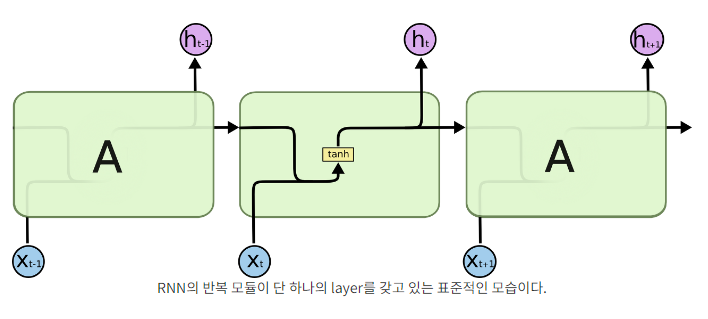


- LSTM (체인은 같은구조지만, 각 반복모듈은 4개의 layer가 동작함)
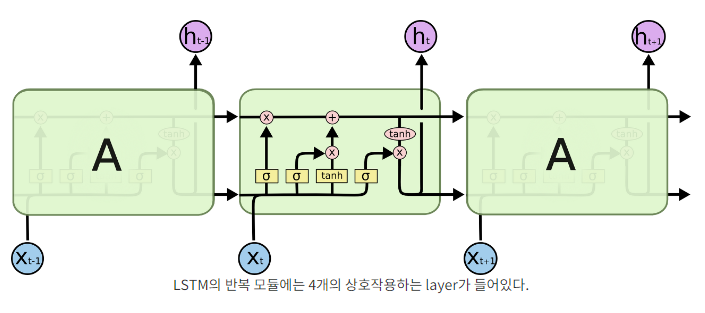

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# num_words 빈도수가 높은 단어만 출력하도록
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, 
                                                        test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


- 로이터 뉴스 데이터
- 총 1만 1,228개의 뉴스 기사
- 46개의 카테고리

In [3]:
print(np.max(y_train) +1 )

46


In [4]:
print(len(X_train))

8982


In [5]:
print(len(X_test))

2246


In [6]:
# 기사가 숫자벡터로 변환된상태
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
# 글자 수 100개로 고정
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_train, maxlen=100)

In [9]:
print(y_train[:5])

[3 4 3 4 4]


In [10]:
# 결과(카테고리)를 원핫인코딩으로 바꿔줌
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
print(y_train[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
model = models.Sequential()
model.add(layers.Embedding(1000, 100))
model.add(layers.LSTM(100, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________
